In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
# 한글깨짐 방지
plt.rc('font', family='AppleGothic')

In [2]:
# 데이터 불러오기
df = pd.read_csv('../data/shopping_behavior_updated.csv')
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [3]:
# 데이터 기본정보 확인, null값 없음
# 수치형 번수 중에서 0으로 된 값도 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
# 각 컬럼에서 값이 0인 곳이 있는지 찾기

for column in df.columns:
    print(column, ':', (df[column] == 0).any())

Customer ID : False
Age : False
Gender : False
Item Purchased : False
Category : False
Purchase Amount (USD) : False
Location : False
Size : False
Color : False
Season : False
Review Rating : False
Subscription Status : False
Shipping Type : False
Discount Applied : False
Promo Code Used : False
Previous Purchases : False
Payment Method : False
Frequency of Purchases : False


In [6]:
# 혹시 1로 대체된 값이 있을 수 있으니 각 컬럼별로 값이 1인 경우가 있는지 확인

for column in df.columns:
    print(column, ':', (df[column] == 1).any())

Customer ID : True
Age : False
Gender : False
Item Purchased : False
Category : False
Purchase Amount (USD) : False
Location : False
Size : False
Color : False
Season : False
Review Rating : False
Subscription Status : False
Shipping Type : False
Discount Applied : False
Promo Code Used : False
Previous Purchases : True
Payment Method : False
Frequency of Purchases : False


In [7]:
# 데이터 기본정보 확인
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

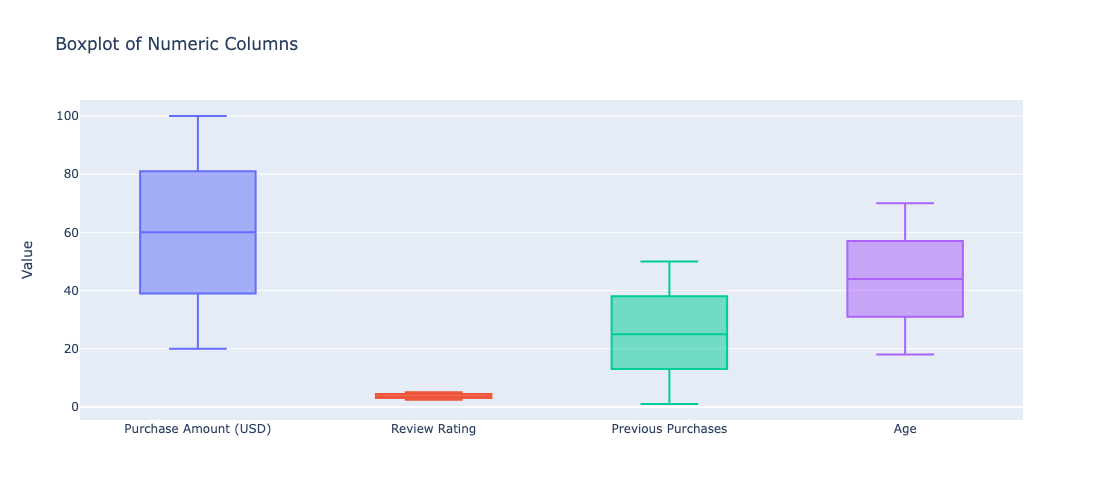

In [8]:
# 수치형 변수 이상치 확인

fig = go.Figure()

fig.add_trace(go.Box(y=df['Purchase Amount (USD)'], name='Purchase Amount (USD)'))
fig.add_trace(go.Box(y=df['Review Rating'], name='Review Rating'))
fig.add_trace(go.Box(y=df['Previous Purchases'], name='Previous Purchases'))
fig.add_trace(go.Box(y=df['Age'], name='Age'))

fig.update_layout(title='Boxplot of Numeric Columns',
                  xaxis=dict(title=''),
                  yaxis=dict(title='Value'),
                  width=800,  
                  height=500)  

fig.update_layout(showlegend=False)

fig.show()

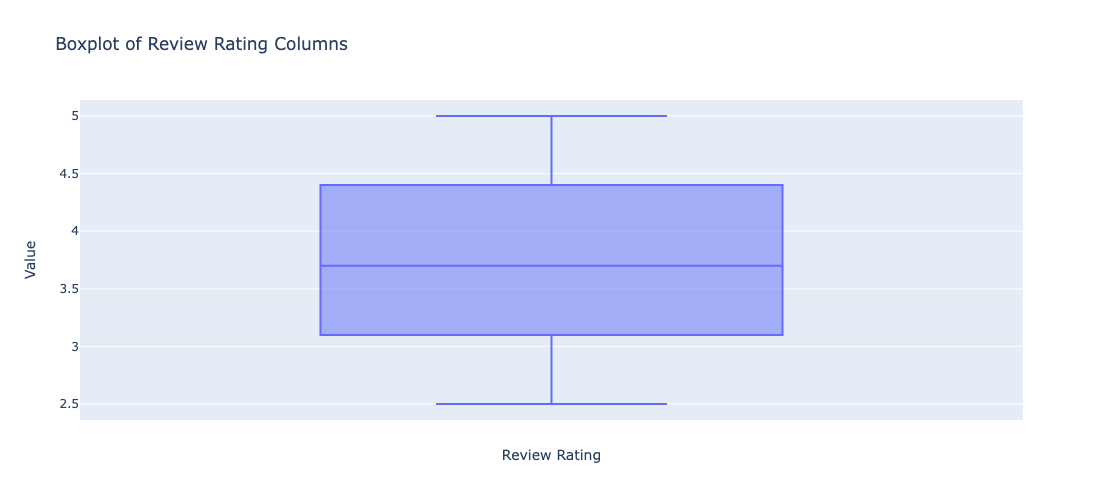

In [9]:
# 모든 컬럼이 이상치가 없음 
# Review Rating 컬럼이 잘 안보이므로 Review Rating만 따로 한 번 보기 -> 이것도 역시 이상치 없음

fig = px.box(df, y='Review Rating', 
             title='Boxplot of Review Rating Columns',
             width=300, height=500)  

fig.update_layout(xaxis_title='Review Rating', yaxis_title='Value')  
fig.show()

In [10]:
# 상관계수 확인을 위해 범주형 컬럼을 수치형으로 변경
# 범주형 컬럼 : Gender, Subscription Status, Discount Applied, Frequency of Purchases

In [11]:
# Gender 컬럼 수치형으로 변경하는 함수

def gender_to_num(gender):
  if gender == 'Male':
    return 0
  else:
    return 1

In [12]:
# 수치형으로 변경한 Gender 컬럼 생성

df['gender'] = df['Gender'].apply(gender_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  gender  
0          Venmo            Fortnightly       0  
1           Cash            Fortnightly       0  
2    Credit Card                 Weekly       0  
3         PayPal                 Weekly       0  
4         PayPal               Annually       0

In [13]:
# Subscription Status 컬럼 수치형으로 변경하는 함수

def subscription_to_num(subscription_status):
  if subscription_status == 'No':
    return 0
  else:
    return 1

In [14]:
# 수치형으로 변경한 Subscription Status 컬럼 생성

df['subscription_status'] = df['Subscription Status'].apply(subscription_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  gender  subscription_status  
0          Venmo            Fortnightly       0                    1  
1           Cash            Fortnightly       0                    1  
2    Credit Card                 Weekly       0                    1  
3         PayPal                 Weekly       0                    1  
4         PayPal               Annually       0                    1

In [15]:
# Discount Applied 컬럼 수치형으로 변경 함수

def discount_to_num(discount_applied):
  if discount_applied == 'No':
    return 0
  else:
    return 1

In [16]:
# 수치형으로 변경한 Discount Applied 컬럼 생성

df['discount_applied'] = df['Discount Applied'].apply(discount_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

   Shipping Type Discount Applied Promo Code Used Previous Purchases  \
0        Express              Yes             Yes                 14   
1        Express              Yes             Yes                  2   
2  Free Shipping              Yes             Yes                 23   
3   Next Day Air              Yes             Yes                 49   
4  Free Shipping              Yes             Yes                 31   

   Payment Method Frequency of Purchases gender  subscription_status  \
0           Venmo            Fortnightly      0                    1   
1            Cash            Fortnightly      0                    1   
2     Credit Card                 Weekly      0                    1   
3          PayPal                 Weekly      0                    1   
4          PayPal               Annually      0                    1   

   discount_applied  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 21 columns]

In [17]:
# Frequency of Purchases 컬럼 수치형으로 변경하는 함수

def frequency_to_num(frequency_of_purchases):
    
    if frequency_of_purchases == 'Weekly':
        return 5
    elif frequency_of_purchases in ['Fortnightly', 'Bi-Weekly']:
        return 4
    elif frequency_of_purchases == 'Monthly':
        return 3
    elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
        return 2
    else:
        return 1

In [18]:
# 수치형으로 변경한 Frequency of Purchases 컬럼 생성

df['frequency_of_purchases'] = df['Frequency of Purchases'].apply(frequency_to_num)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Shipping Type Discount Applied  \
0       Kentucky    L       Gray  Winter  ...        Express              Yes   
1          Maine    L     Maroon  Winter  ...        Express              Yes   
2  Massachusetts    S     Maroon  Spring  ...  Free Shipping              Yes   
3   Rhode Island    M     Maroon  Spring  ...   Next Day Air              Yes   
4         Oregon    M  Turquoise  Spring  ...  Free Shipping              Yes   

  Promo Code Used Previous Purchases Payment Method  Frequency of Purchases  \
0             Yes                 14          Venmo             Fortnightly   
1             Yes                  2           Cash             Fortnightly   
2             Yes                 23    Credit Card                  Weekly   
3             Yes                 49         PayPal                  Weekly   
4             Yes                 31         PayPal                Annually   

  gender subscription_status  discount_applied  frequency_of_purchases  
0      0                   1                 1                       4  
1      0                   1                 1                       4  
2      0                   1                 1                       5  
3      0                   1                 1                       5  
4      0                   1                 1                       1  

[5 rows x 22 columns]

In [19]:
# 수치형으로 변경한 컬럼 확인
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Shipping Type Discount Applied  \
0       Kentucky    L       Gray  Winter  ...        Express              Yes   
1          Maine    L     Maroon  Winter  ...        Express              Yes   
2  Massachusetts    S     Maroon  Spring  ...  Free Shipping              Yes   
3   Rhode Island    M     Maroon  Spring  ...   Next Day Air              Yes   
4         Oregon    M  Turquoise  Spring  ...  Free Shipping              Yes   

  Promo Code Used Previous Purchases Payment Method  Frequency of Purchases  \
0             Yes                 14          Venmo             Fortnightly   
1             Yes                  2           Cash             Fortnightly   
2             Yes                 23    Credit Card                  Weekly   
3             Yes                 49         PayPal                  Weekly   
4             Yes                 31         PayPal                Annually   

  gender subscription_status  discount_applied  frequency_of_purchases  
0      0                   1                 1                       4  
1      0                   1                 1                       4  
2      0                   1                 1                       5  
3      0                   1                 1                       5  
4      0                   1                 1                       1  

[5 rows x 22 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [21]:
# 컬럼별 상관계수 확인

corr=df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'gender', 
       'subscription_status', 'discount_applied', 'frequency_of_purchases']].corr(method='pearson')
corr

Age  Purchase Amount (USD)  Review Rating  \
Age                     1.000000              -0.010424      -0.021949   
Purchase Amount (USD)  -0.010424               1.000000       0.030776   
Review Rating          -0.021949               0.030776       1.000000   
Previous Purchases      0.040445               0.008063       0.004229   
gender                 -0.002763               0.014044      -0.008164   
subscription_status     0.006492              -0.006996      -0.006368   
discount_applied        0.004366              -0.017798      -0.012486   
frequency_of_purchases -0.009725              -0.012473      -0.004025   

                        Previous Purchases    gender  subscription_status  \
Age                               0.040445 -0.002763             0.006492   
Purchase Amount (USD)             0.008063  0.014044            -0.006996   
Review Rating                     0.004229 -0.008164            -0.006368   
Previous Purchases                1.000000 -0.035873             0.030859   
gender                           -0.035873  1.000000            -0.417197   
subscription_status               0.030859 -0.417197             1.000000   
discount_applied                  0.023537 -0.595823             0.700202   
frequency_of_purchases            0.005258  0.004067             0.011689   

                        discount_applied  frequency_of_purchases  
Age                             0.004366               -0.009725  
Purchase Amount (USD)          -0.017798               -0.012473  
Review Rating                  -0.012486               -0.004025  
Previous Purchases              0.023537                0.005258  
gender                         -0.595823                0.004067  
subscription_status             0.700202                0.011689  
discount_applied                1.000000                0.006064  
frequency_of_purchases          0.006064                1.000000

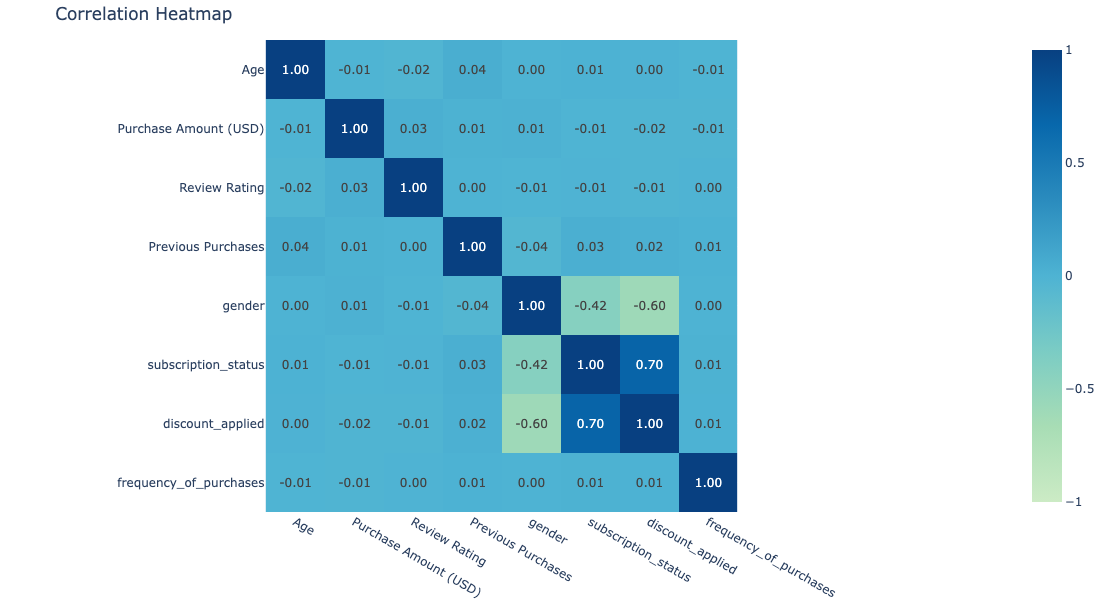

In [22]:
fig = px.imshow(corr.values,
                x=corr.columns,
                y=corr.index,
                text_auto = '.2f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],  
                color_continuous_midpoint=0,  
                labels=dict(x='', y=''),  
                title='Correlation Heatmap')

fig.update_layout(width=800, 
                  height=600,  
                  margin=dict(l=0, r=0, t=40, b=0))  

fig.show()

In [23]:
# 고객 남녀 수 확인

df_gender_count =df['Gender'].value_counts().sort_values(ascending=False)
pd.DataFrame(df_gender_count)

count
Gender       
Male     2652
Female   1248

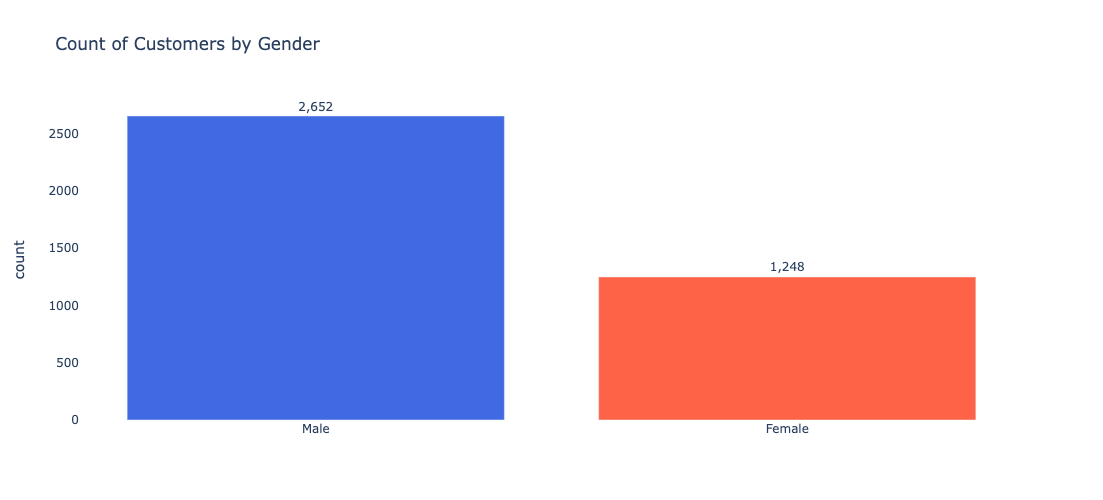

In [24]:
# 고객 남녀 수 그래프

fig = px.bar(df_gender_count, x=df_gender_count.index, y=df_gender_count.values, 
             title='Count of Customers by Gender',
             color=df_gender_count.index,
             color_discrete_sequence=['royalblue', 'tomato'],
             text=df_gender_count.values)  

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='',  
    yaxis_title='count',  
    width=600,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [25]:
# 고객 남녀 성비 확인
df_gender = df['Gender'].value_counts().sort_values(ascending=False)/df['Customer ID'].count()*100
pd.DataFrame(df_gender)

count
Gender       
Male     68.0
Female   32.0

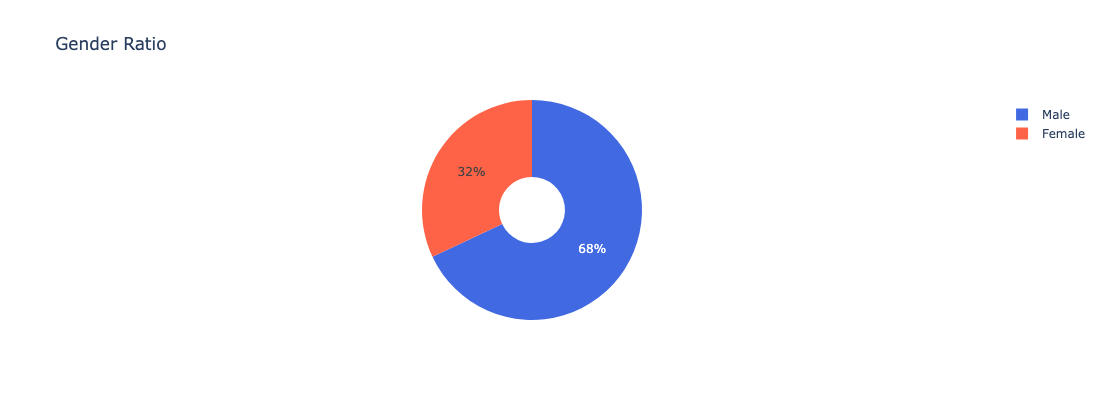

In [26]:
# 고객 남녀 비율 그래프

fig = px.pie(df_gender, values=df_gender, names=df_gender.index,
             title='Gender Ratio', color_discrete_sequence=['royalblue', 'tomato'],  
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [27]:
# Age 컬럼을 구간별로 나누는 함수
def age_cat(age):
  return str((age//10) * 10) + '대'

In [28]:
# Age 컬럼을 구간별로 카테고리화한 컬럼 생성
df['age_group'] = df['Age'].apply(age_cat)
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Discount Applied  \
0       Kentucky    L       Gray  Winter  ...               Yes   
1          Maine    L     Maroon  Winter  ...               Yes   
2  Massachusetts    S     Maroon  Spring  ...               Yes   
3   Rhode Island    M     Maroon  Spring  ...               Yes   
4         Oregon    M  Turquoise  Spring  ...               Yes   

  Promo Code Used Previous Purchases Payment Method Frequency of Purchases  \
0             Yes                 14          Venmo            Fortnightly   
1             Yes                  2           Cash            Fortnightly   
2             Yes                 23    Credit Card                 Weekly   
3             Yes                 49         PayPal                 Weekly   
4             Yes                 31         PayPal               Annually   

   gender subscription_status discount_applied  frequency_of_purchases  \
0       0                   1                1                       4   
1       0                   1                1                       4   
2       0                   1                1                       5   
3       0                   1                1                       5   
4       0                   1                1                       1   

   age_group  
0        50대  
1        10대  
2        50대  
3        20대  
4        40대  

[5 rows x 23 columns]

In [29]:
# 고객 연령대 확인
df_by_agegroup = df['age_group'].value_counts().sort_index()
pd.DataFrame(df_by_agegroup)

count
age_group       
10대          150
20대          728
30대          724
40대          739
50대          771
60대          721
70대           67

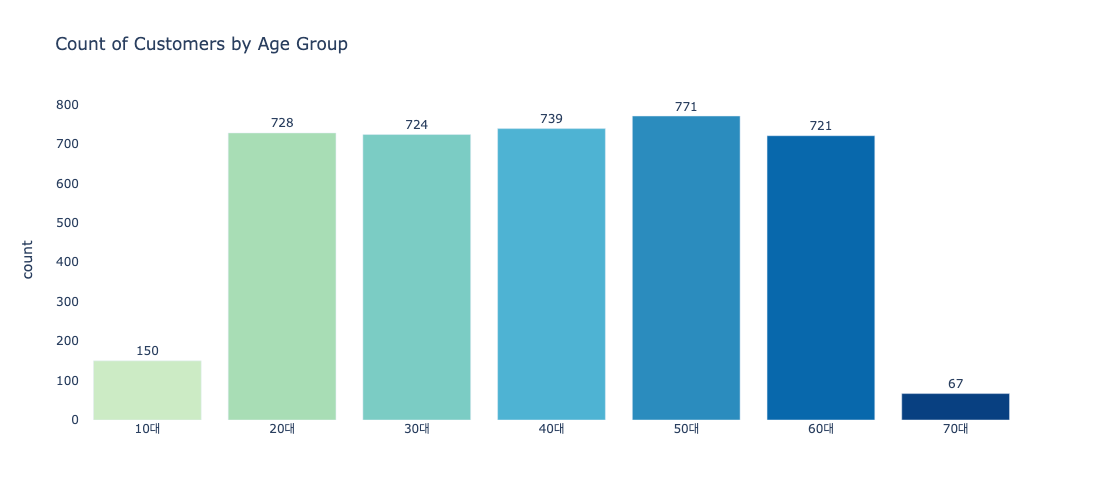

In [30]:
# 고객 연령대별 판매량 그래프

fig = px.bar(df_by_agegroup, x=df_by_agegroup.index, y=df_by_agegroup.values, 
             title='Count of Customers by Age Group',
             color=df_by_agegroup.index,
             color_discrete_sequence=px.colors.sequential.GnBu[2:],
             text=df_by_agegroup.values)  

fig.update_traces(textposition='outside')  

fig.update_layout(
    xaxis_title='',
    yaxis_title='count', 
    width=600, 
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

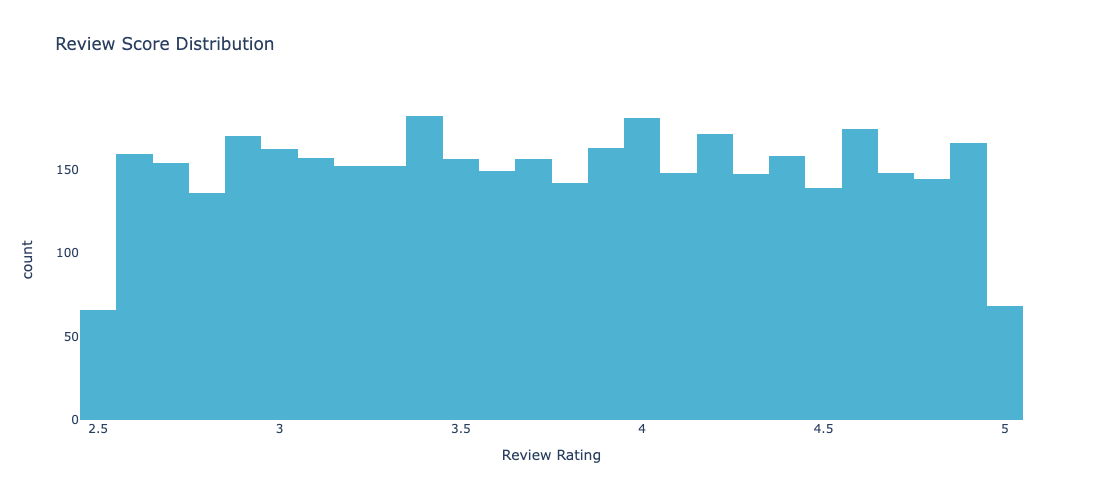

In [31]:
fig = px.histogram(df, x='Review Rating', nbins=50, 
                   title='Review Score Distribution',
                   color_discrete_sequence=[px.colors.sequential.GnBu[5]])

fig.update_layout(width=600,  
                  height=500,
                  plot_bgcolor='white')  

fig.show() 

In [32]:
# Size별 판매량 확인
df_by_size = df['Size'].value_counts().sort_index().loc[['S', 'M', 'L', 'XL']]
pd.DataFrame(df_by_size)

count
Size       
S       663
M      1755
L      1053
XL      429

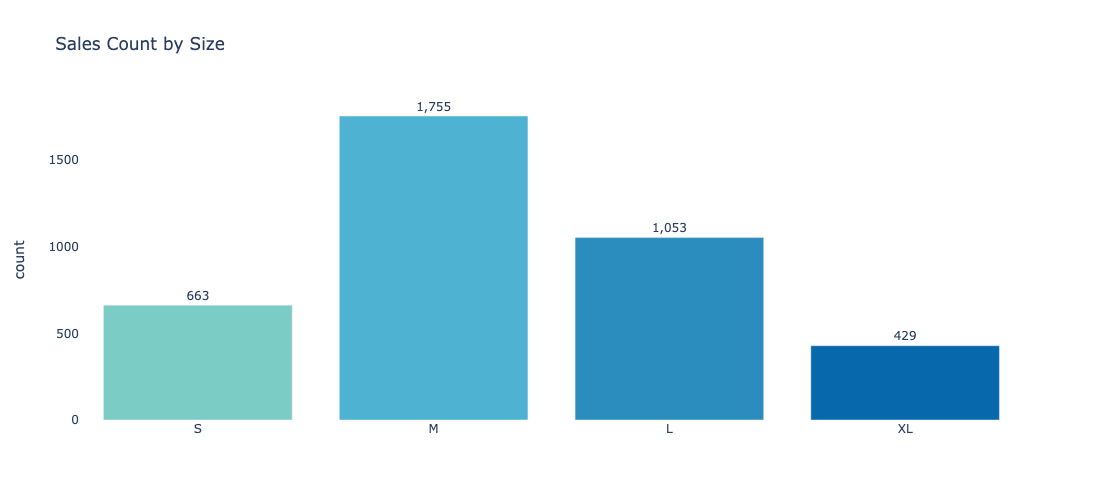

In [33]:
fig = px.bar(df_by_size, x=df_by_size.index, y=df_by_size.values,
             title='Sales Count by Size',
             color=df_by_size.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[4:])  

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(width=600,  
                  height=500, 
                  xaxis_title='',  
                  yaxis_title='count',  
                  plot_bgcolor='white')  

fig.update_layout(showlegend=False)

fig.show()

In [34]:
# Location별 판매량 확인
df_by_location = df['Location'].value_counts().sort_values(ascending=False)
pd.DataFrame(df_by_location)

count
Location             
Montana            96
California         95
Idaho              93
Illinois           92
Alabama            89
Minnesota          88
New York           87
Nevada             87
Nebraska           87
Delaware           86
Maryland           86
Vermont            85
Louisiana          84
North Dakota       83
West Virginia      81
Missouri           81
New Mexico         81
Mississippi        80
Kentucky           79
Arkansas           79
Georgia            79
Indiana            79
Connecticut        78
North Carolina     78
Maine              77
Ohio               77
Virginia           77
Texas              77
Tennessee          77
South Carolina     76
Oklahoma           75
Wisconsin          75
Colorado           75
Oregon             74
Pennsylvania       74
Michigan           73
Washington         73
Alaska             72
Massachusetts      72
Utah               71
Wyoming            71
New Hampshire      71
South Dakota       70
Iowa               69
Florida            68
New Jersey         67
Arizona            65
Hawaii             65
Rhode Island       63
Kansas             63

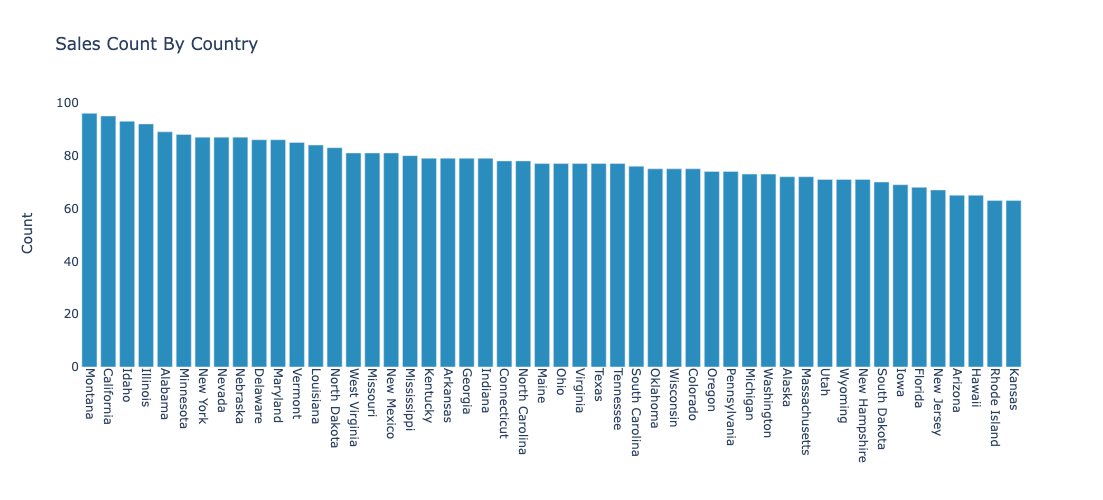

In [35]:
# 국가별 판매수량

fig = px.bar(df_by_location, x=df_by_location.index, y=df_by_location.values,
             title='Sales Count By Country',
             color=df_by_location.index,
             color_discrete_sequence=['rgb(43, 140, 190)'])

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Count',  
    xaxis_tickangle=90,  
    width=1000,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [36]:
# Payment Method별 거래수 확인
df_by_payment = df['Payment Method'].value_counts().sort_values()
pd.DataFrame(df_by_payment)

count
Payment Method       
Bank Transfer     612
Venmo             634
Debit Card        636
Cash              670
Credit Card       671
PayPal            677

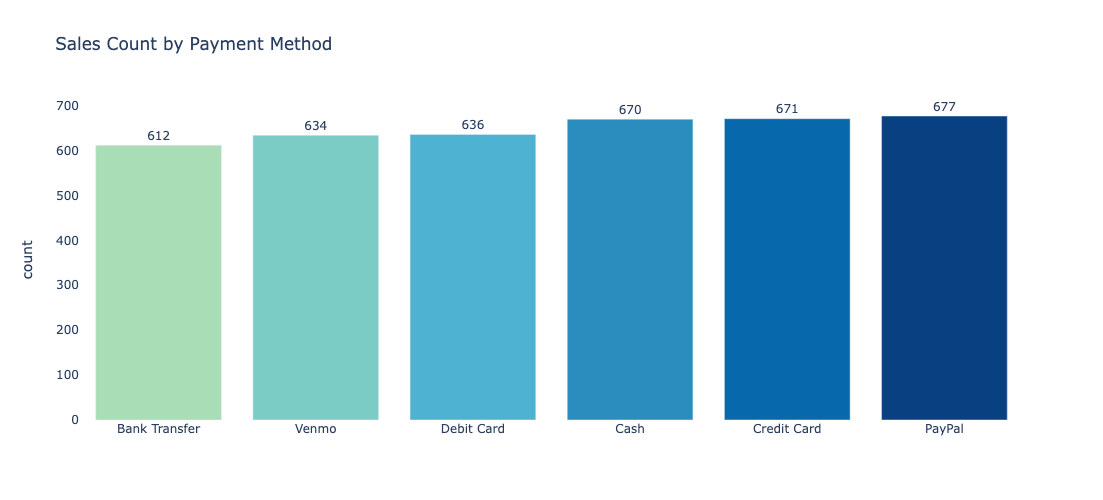

In [37]:
# Payment Method별 거래수 그래프

fig = px.bar(df_by_payment, x=df_by_payment.index, y='count',
             title='Sales Count by Payment Method',
             color=df_by_payment.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[3:])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',  
    xaxis_tickangle=0,  
    width=600,  
    height=500,
    plot_bgcolor='white')

fig.update_layout(showlegend=False)

fig.show()

In [38]:
# Shipping Type별 거래수 확인
df_by_shipping = df['Shipping Type'].value_counts().sort_values()
pd.DataFrame(df_by_shipping)

count
Shipping Type        
2-Day Shipping    627
Express           646
Next Day Air      648
Store Pickup      650
Standard          654
Free Shipping     675

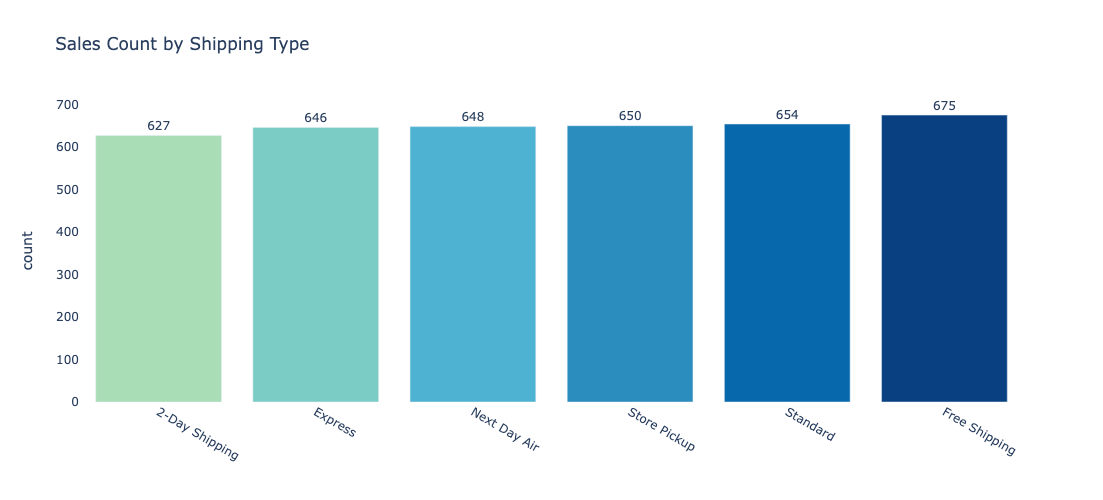

In [39]:
# Shipping Type별 거래수 그래프

fig = px.bar(df_by_shipping, x=df_by_shipping.index, y='count',
             title='Sales Count by Shipping Type',
             color=df_by_shipping.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[3:])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',  
    xaxis_tickangle=30,  
    width=600,  
    height=500,
    plot_bgcolor='white')

fig.update_layout(showlegend=False)

fig.show()

In [40]:
# Item Purchased별 판매량 확인

df_by_item = df['Item Purchased'].value_counts().sort_values(ascending=False)
pd.DataFrame(df_by_item)

count
Item Purchased       
Blouse            171
Pants             171
Jewelry           171
Shirt             169
Dress             166
Sweater           164
Jacket            163
Coat              161
Sunglasses        161
Belt              161
Sandals           160
Socks             159
Skirt             158
Scarf             157
Shorts            157
Hat               154
Handbag           153
Hoodie            151
Shoes             150
T-shirt           147
Sneakers          145
Boots             144
Backpack          143
Gloves            140
Jeans             124

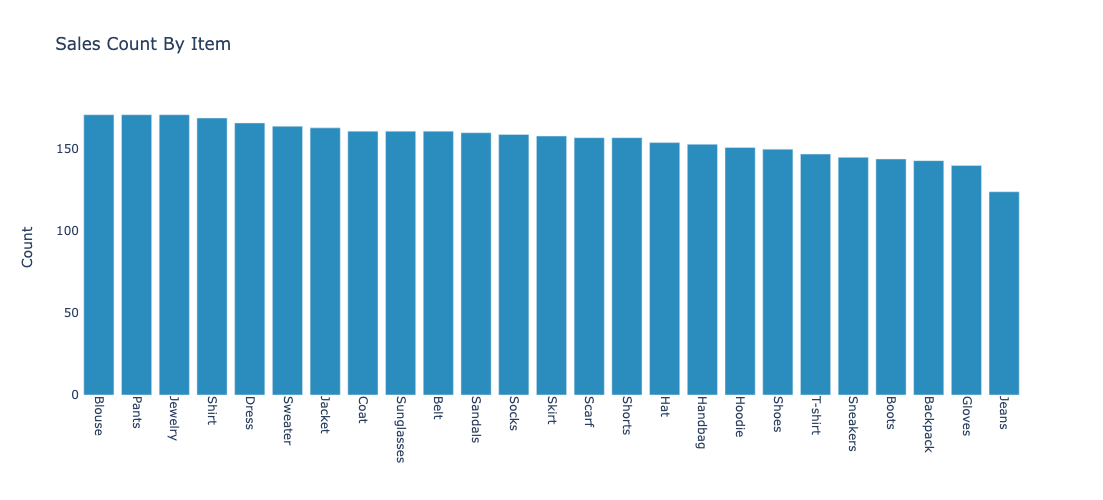

In [41]:
# Item Purchased별 판매량 그래프

fig = px.bar(df_by_item, x=df_by_item.index, y=df_by_item.values,
             title='Sales Count By Item',
             color=df_by_item.index,
             color_discrete_sequence=['rgb(43, 140, 190)'])

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Count',  
    xaxis_tickangle=90,  
    width=800,  
    height=500,
    plot_bgcolor='white'
)

fig.update_layout(showlegend=False)

fig.show()

In [42]:
# 이제 심층분석 : 보통 매출 증대를 위해 할인 프로모션을 하는 경우가 많으니 할인 프로모션을 생각해보자
# 할인 프로모션을 하는 것이 타당한지 보기 위해 매출액, 구매빈도와 할인적용 컬럼의 상관관계 확인

# 구매금액(Purchase Amount)컬럼, 할인(Discount Applied)컬럼의 상관계수 확인

corr2 = df[['Purchase Amount (USD)', 'discount_applied']].corr(method='pearson')
corr2

Purchase Amount (USD)  discount_applied
Purchase Amount (USD)               1.000000         -0.017798
discount_applied                   -0.017798          1.000000

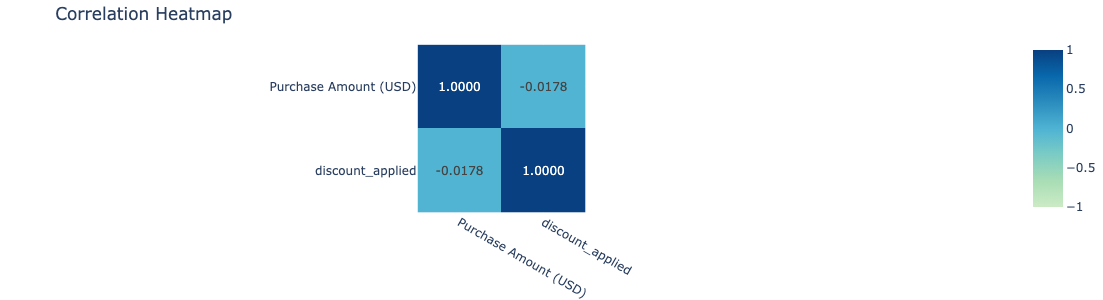

In [43]:
fig = px.imshow(corr2.values,
                x=corr2.columns,
                y=corr2.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=400,
    height=300,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [44]:
# 전체고객을 대상으로 보면 상관관계가 있어보이지 않는다. 심슨의 역설이 생길 수 있으니 Regular고객과 Royal고객으로 클러스터링 한 후 상관관계가 있는지 확인하자

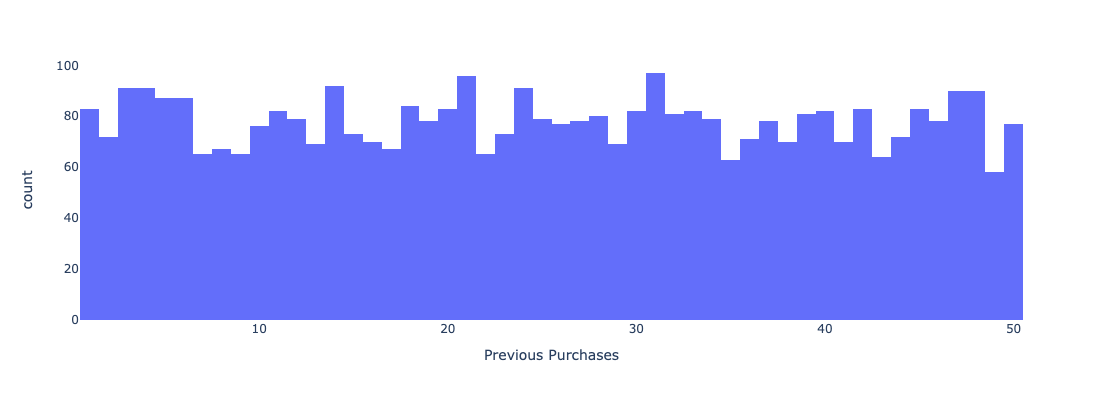

In [45]:
# 우선 고객들을 Regular고객과 Royal고객으로 나누는 기준을 세워야 한다.
# 첫 번째 방법 : 히스토그램으로 봤을 때 확연히 구분되는 구간이 있어보이지 않아 기준을 세우기 어렵다

fig = px.histogram(df, x='Previous Purchases', nbins=50)
fig.update_layout(
    width=600,  # 그래프의 너비 조정
    height=400,  # 그래프의 높이 조정
    plot_bgcolor='white'
)
fig.show()

In [46]:
# 두 번째 방법 : kmeans라이브러리를 사용해 고객 클러스터링 해보기
# 정보가 많이 없어서 클러스터링 방법이 적합한 방법은 아닌 것 같지만 한 번 시도

In [47]:
from kmeans_visual import visualize_silhouette

In [48]:
# Previous Purchases, Purchase Amount (USD)컬럼 2개만 넣어서 확인

X_features = df[['Previous Purchases', 'Purchase Amount (USD)']]

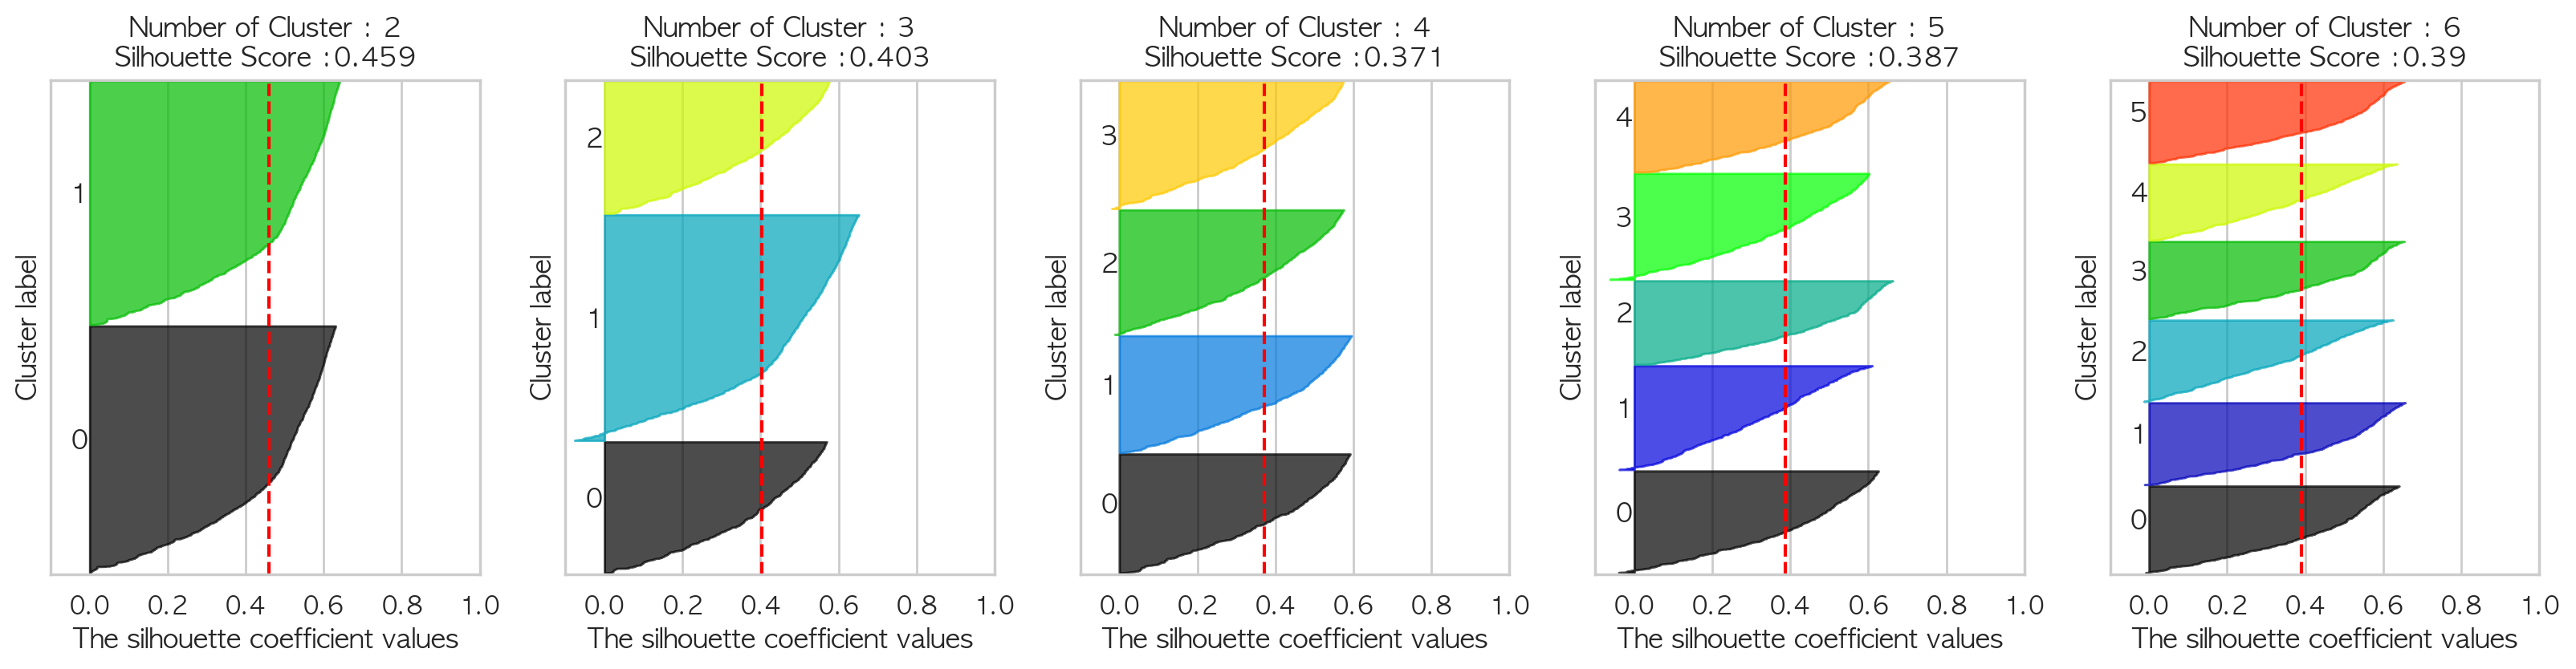

In [49]:
visualize_silhouette([2, 3, 4, 5, 6], X_features)

In [50]:
# 결과값이 2개로 클러스터링을 했을 때 실루엣계수가 제일 높으므로 2그룹으로 나누기로 결정

In [51]:
from sklearn.cluster import KMeans

In [52]:
# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=2)

In [53]:
kmeans.fit(X_features)

KMeans(n_clusters=2)

In [54]:
# 클러스터 예측
df['segmentation'] = kmeans.predict(X_features)

In [55]:
df['segmentation'].value_counts()

segmentation
0    1963
1    1937
Name: count, dtype: int64

In [56]:
df.groupby('segmentation')['Purchase Amount (USD)'].sum()

segmentation
0    157487
1     75594
Name: Purchase Amount (USD), dtype: int64

In [57]:
df.groupby('segmentation')['Purchase Amount (USD)'].mean()

segmentation
0    80.227713
1    39.026329
Name: Purchase Amount (USD), dtype: float64

In [58]:
df.groupby('segmentation')['Previous Purchases'].mean()

segmentation
0    25.534896
1    25.165720
Name: Previous Purchases, dtype: float64

In [59]:
df.groupby('segmentation')['frequency_of_purchases'].mean()

segmentation
0    2.960265
1    2.976252
Name: frequency_of_purchases, dtype: float64

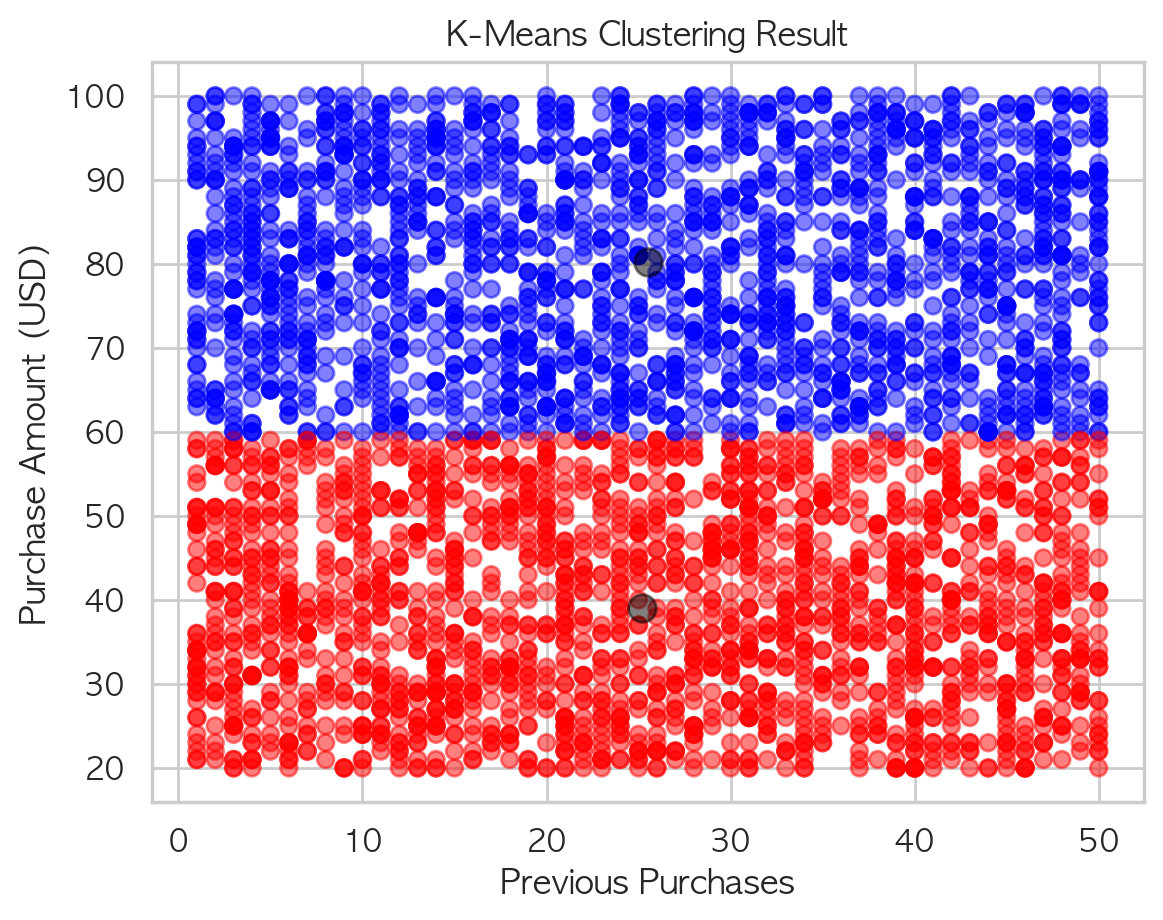

In [60]:
# 클러스터 중심 위치
centers = kmeans.cluster_centers_

# 각 클러스터의 색깔
colors = ['blue' if label == 0 else 'red' for label in df['segmentation']]

# 데이터 포인트 그리기
plt.scatter(df['Previous Purchases'], df['Purchase Amount (USD)'], c=colors, alpha=0.5)

# 클러스터 중심 그리기
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='black', s=100, alpha=0.5)

plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.title('K-Means Clustering Result')
plt.show()

In [61]:
# 2개로 클러스터링 했을 때 Purchase Amount컬럼에 의해서 클러스터링 되는 것을 알 수 있다.
# 데이터셋 특성상 고객이 마지막으로 구매한 상품 중 하나의 금액이 Purchase Amount 컬럼이므로 Purchase Amount로 클러스터링 되는 것은 타당해 보이지 않음

In [62]:
# 시험삼아 3그룹으로 클러스터링 해보기

kmeans3 = KMeans(n_clusters=3)

In [63]:
kmeans3.fit(X_features)

KMeans(n_clusters=3)

In [64]:
df['segmentation3'] = kmeans3.predict(X_features)

In [65]:
df.groupby('segmentation3')['Purchase Amount (USD)'].sum()

segmentation3
0    83016
1    67863
2    82202
Name: Purchase Amount (USD), dtype: int64

In [66]:
df.groupby('segmentation3')['Purchase Amount (USD)'].mean()

segmentation3
0    78.688152
1    37.659822
2    78.813039
Name: Purchase Amount (USD), dtype: float64

In [67]:
df.groupby('segmentation3')['Previous Purchases'].mean()

segmentation3
0    12.589573
1    25.214206
2    38.497603
Name: Previous Purchases, dtype: float64

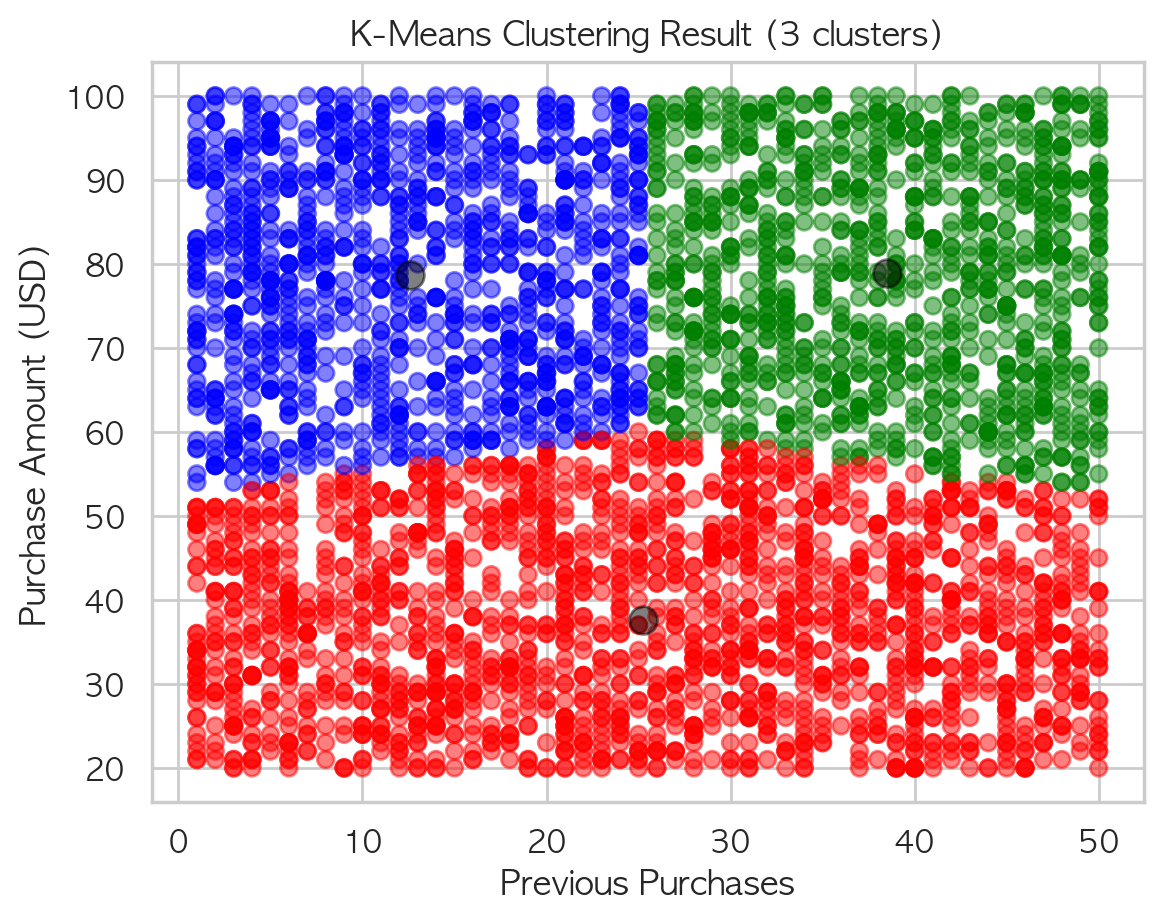

In [68]:
# 클러스터 중심 위치
centers3 = kmeans3.cluster_centers_

# 각 클러스터의 색깔
colors3 = ['blue', 'red', 'green']

# 데이터 포인트 그리기
plt.scatter(df['Previous Purchases'], df['Purchase Amount (USD)'], c=df['segmentation3'].map(lambda x: colors3[x]), alpha=0.5)

# 클러스터 중심 그리기
plt.scatter(centers3[:, 0], centers3[:, 1], marker='o', c='black', s=100, alpha=0.5)

plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.title('K-Means Clustering Result (3 clusters)')
plt.show()

In [69]:
# 3개로 클러스터링될 때는 이전 구매 횟수도 기준이 되는 것 같다.

In [70]:
# kmeans 알고리즘으로 클러스터링 하는 것은 타당해 보이지 않음
# 그냥 내가 기준세워서 고객 segmentation 시도

In [71]:
df.drop(columns=['segmentation'], inplace=True)

In [72]:
df.drop(columns=['segmentation3'], inplace=True)

In [73]:
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  Massachusetts    S     Maroon  Spring  ...   
3                        90   Rhode Island    M     Maroon  Spring  ...   
4                        49         Oregon    M  Turquoise  Spring  ...   
...                     ...            ...  ...        ...     ...  ...   
3895                     28       Virginia    L  Turquoise  Summer  ...   
3896                     49           Iowa    L      White  Spring  ...   
3897                     33     New Jersey    L      Green  Spring  ...   
3898                     77      Minnesota    S      Brown  Summer  ...   
3899                     81     California    M      Beige  Spring  ...   

      Discount Applied Promo Code Used Previous Purchases Payment Method  \
0                  Yes             Yes                 14          Venmo   
1                  Yes             Yes                  2           Cash   
2                  Yes             Yes                 23    Credit Card   
3                  Yes             Yes                 49         PayPal   
4                  Yes             Yes                 31         PayPal   
...                ...             ...                ...            ...   
3895                No              No                 32          Venmo   
3896                No              No                 41  Bank Transfer   
3897                No              No                 24          Venmo   
3898                No              No                 24          Venmo   
3899                No              No                 33          Venmo   

     Frequency of Purchases  gender subscription_status discount_applied  \
0               Fortnightly       0                   1                1   
1               Fortnightly       0                   1                1   
2                    Weekly       0                   1                1   
3                    Weekly       0                   1                1   
4                  Annually       0                   1                1   
...                     ...     ...                 ...              ...   
3895                 Weekly       1                   0                0   
3896              Bi-Weekly       1                   0                0   
3897              Quarterly       1                   0                0   
3898                 Weekly       1                   0                0   
3899              Quarterly       1                   0                0   

      frequency_of_purchases  age_group  
0                          4        50대  
1                          4        10대  
2                          5        50대  
3                          5        20대  
4                          1        40대  
...                      ...        ...  
3895                       5        40대  
3896                       4        50대  
3897                       2        40대  
3898                       5        40대  
3899                       2        50대  

[3900 rows x 23 columns]

In [74]:
# 우선 Royal-Regular고객으로 기준세워 분류하기
# 충성고객 정의 : Previous Purchases 컬럼을 기준으로 30회 이상인 고객들의 매출액의 합이 전체 매출액의 40% 차지 
# 매출액의 40%정도를 차지하므로 이것을 기준으로 고객을 나누기로 함

In [75]:
Royal_df = df[df['Previous Purchases'] > 30]
Regular_df = df[~(df['Previous Purchases'] > 30)]

In [76]:
Royal_df['Purchase Amount (USD)'].sum()

92984

In [77]:
Regular_df['Purchase Amount (USD)'].sum()

140097

In [78]:
# VIP-Regular 고객으로 카테고리화 하는 함수

def customer_re_grouping(previous_purchases):
    if previous_purchases > 30:
        return 'Royal'
    else:
        return 'Regular'

In [79]:
df['customer_class'] = df['Previous Purchases'].apply(customer_re_grouping)

In [80]:
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Promo Code Used  \
0       Kentucky    L       Gray  Winter  ...              Yes   
1          Maine    L     Maroon  Winter  ...              Yes   
2  Massachusetts    S     Maroon  Spring  ...              Yes   
3   Rhode Island    M     Maroon  Spring  ...              Yes   
4         Oregon    M  Turquoise  Spring  ...              Yes   

  Previous Purchases Payment Method Frequency of Purchases gender  \
0                 14          Venmo            Fortnightly      0   
1                  2           Cash            Fortnightly      0   
2                 23    Credit Card                 Weekly      0   
3                 49         PayPal                 Weekly      0   
4                 31         PayPal               Annually      0   

   subscription_status discount_applied frequency_of_purchases  age_group  \
0                    1                1                      4        50대   
1                    1                1                      4        10대   
2                    1                1                      5        50대   
3                    1                1                      5        20대   
4                    1                1                      1        40대   

   customer_class  
0         Regular  
1         Regular  
2         Regular  
3           Royal  
4           Royal  

[5 rows x 24 columns]

In [81]:
# VIP고객의 Purchase Amount, discount_applied 컬럼 상관관계 보기
# 심슨의 역설이 있을 수 있으니 그룹핑 후 상관관계 다시 확인

df_by_royal = df[df['customer_class'] == 'Royal']
corr3 = df_by_royal[['Purchase Amount (USD)', 'discount_applied']].corr(method='pearson')
corr3

Purchase Amount (USD)  discount_applied
Purchase Amount (USD)               1.000000         -0.037958
discount_applied                   -0.037958          1.000000

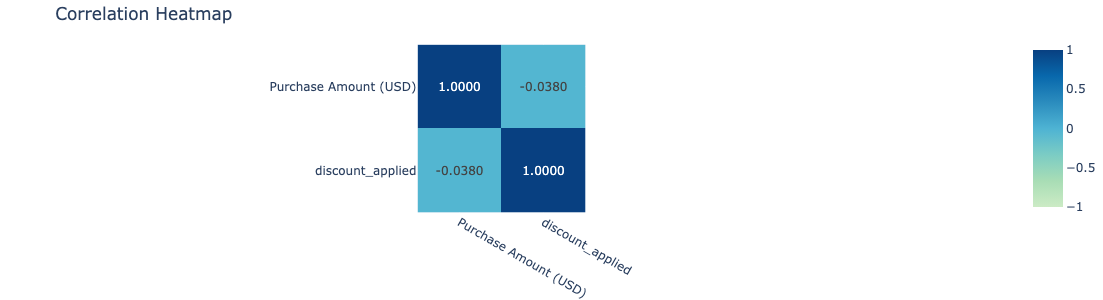

In [82]:
fig = px.imshow(corr3.values,
                x=corr3.columns,
                y=corr3.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=400,
    height=300,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [83]:
# 이렇게 해도 상관계수가 커지지는 않음

In [84]:
# 다른 컬럼들의 상관계수도 확인
# 그룹핑 전보다 오히려 상관계수들이 작아짐

corr4 = df_by_royal[['Age', 
       'Purchase Amount (USD)', 
       'Review Rating', 'Previous Purchases', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases']].corr(method='pearson')
corr4

Age  Purchase Amount (USD)  Review Rating  \
Age                     1.000000              -0.004273      -0.020612   
Purchase Amount (USD)  -0.004273               1.000000       0.050035   
Review Rating          -0.020612               0.050035       1.000000   
Previous Purchases      0.000585               0.036735      -0.006660   
gender                 -0.033585               0.016260       0.019334   
subscription_status     0.010519              -0.019962      -0.000530   
discount_applied        0.006857              -0.037958      -0.039999   
frequency_of_purchases  0.021736              -0.023542       0.019644   

                        Previous Purchases    gender  subscription_status  \
Age                               0.000585 -0.033585             0.010519   
Purchase Amount (USD)             0.036735  0.016260            -0.019962   
Review Rating                    -0.006660  0.019334            -0.000530   
Previous Purchases                1.000000 -0.018172            -0.017336   
gender                           -0.018172  1.000000            -0.420103   
subscription_status              -0.017336 -0.420103             1.000000   
discount_applied                  0.030176 -0.591862             0.709799   
frequency_of_purchases           -0.022577 -0.021587             0.033435   

                        discount_applied  frequency_of_purchases  
Age                             0.006857                0.021736  
Purchase Amount (USD)          -0.037958               -0.023542  
Review Rating                  -0.039999                0.019644  
Previous Purchases              0.030176               -0.022577  
gender                         -0.591862               -0.021587  
subscription_status             0.709799                0.033435  
discount_applied                1.000000                0.027313  
frequency_of_purchases          0.027313                1.000000

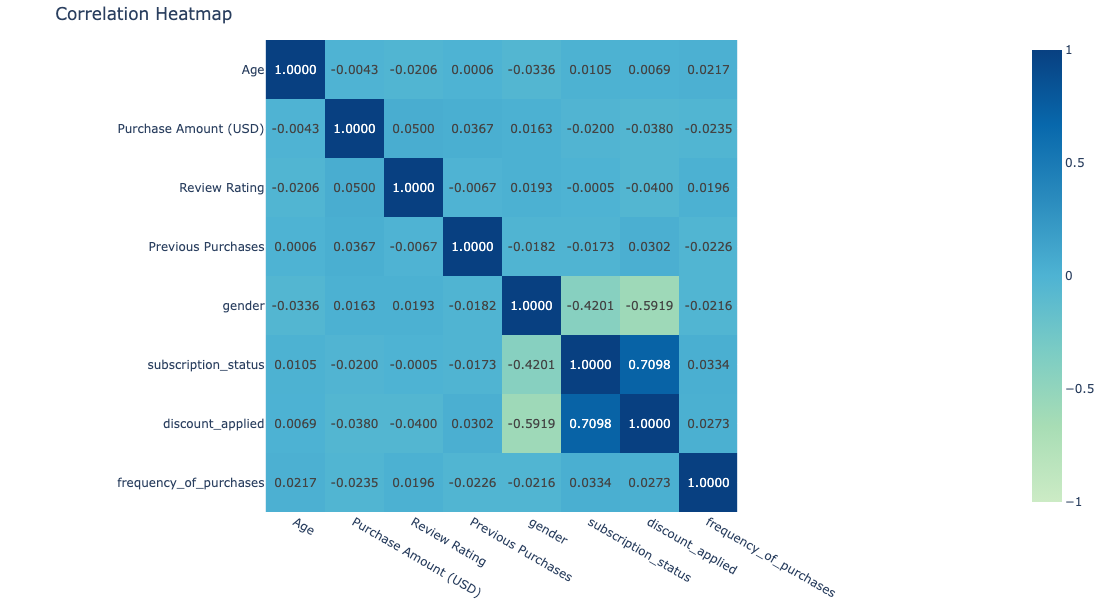

In [85]:
fig = px.imshow(corr4.values,
                x=corr4.columns,
                y=corr4.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [86]:
df_by_regular = df[df['customer_class'] == 'Regular']
corr5 = df_by_regular[['Purchase Amount (USD)', 'discount_applied']].corr(method='pearson')
corr5

Purchase Amount (USD)  discount_applied
Purchase Amount (USD)               1.000000         -0.004708
discount_applied                   -0.004708          1.000000

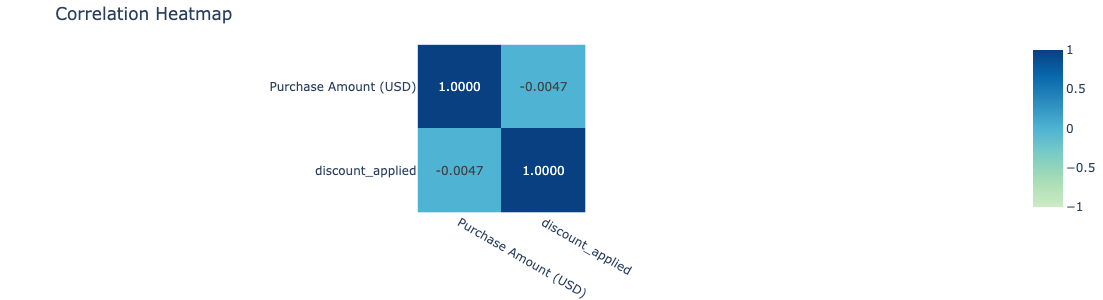

In [87]:
fig = px.imshow(corr5.values,
                x=corr5.columns,
                y=corr5.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=400,
    height=300,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [88]:
corr6 = df_by_regular[['Age', 
       'Purchase Amount (USD)', 
       'Review Rating', 'Previous Purchases', 'gender',
       'subscription_status', 'discount_applied', 'frequency_of_purchases']].corr(method='pearson')
corr6

Age  Purchase Amount (USD)  Review Rating  \
Age                     1.000000              -0.015032      -0.024015   
Purchase Amount (USD)  -0.015032               1.000000       0.017894   
Review Rating          -0.024015               0.017894       1.000000   
Previous Purchases      0.028458              -0.015074      -0.030983   
gender                  0.018421               0.012893      -0.025315   
subscription_status     0.002381               0.001385      -0.011060   
discount_applied        0.001845              -0.004708       0.005132   
frequency_of_purchases -0.031105              -0.005431      -0.019811   

                        Previous Purchases    gender  subscription_status  \
Age                               0.028458  0.018421             0.002381   
Purchase Amount (USD)            -0.015074  0.012893             0.001385   
Review Rating                    -0.030983 -0.025315            -0.011060   
Previous Purchases                1.000000 -0.046788             0.038722   
gender                           -0.046788  1.000000            -0.414976   
subscription_status               0.038722 -0.414976             1.000000   
discount_applied                  0.017071 -0.598271             0.693625   
frequency_of_purchases           -0.003756  0.020966            -0.003343   

                        discount_applied  frequency_of_purchases  
Age                             0.001845               -0.031105  
Purchase Amount (USD)          -0.004708               -0.005431  
Review Rating                   0.005132               -0.019811  
Previous Purchases              0.017071               -0.003756  
gender                         -0.598271                0.020966  
subscription_status             0.693625               -0.003343  
discount_applied                1.000000               -0.008180  
frequency_of_purchases         -0.008180                1.000000

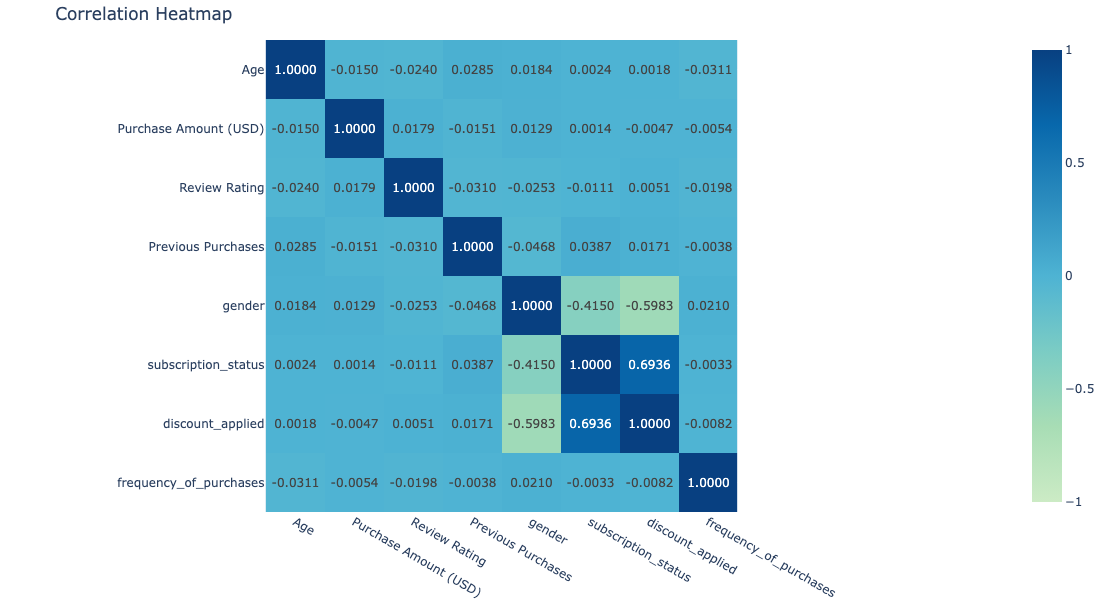

In [89]:
fig = px.imshow(corr6.values,
                x=corr6.columns,
                y=corr6.index,
                text_auto = '.4f',
                color_continuous_scale=px.colors.sequential.GnBu[2:],
                color_continuous_midpoint=0,
                title='Correlation Heatmap')

fig.update_layout(
    width=800,
    height=600,
    margin=dict(l=0, r=0, t=40, b=0),
)

fig.show()

In [90]:
# 그룹을 나눈 후에도 상관관계가 없어 보이므로 할인프로모션은 제외
# 그러면 royal 고객과 Regular 고객을 타겟팅해서 프로모션을 할지 전체고객을 대상으로 할지 결정을 해야 하므로
# 평균 구매단가를 전체를 대상으로도 보고 Regular-VIP고객을 그룹핑한 다음에도 보자.

In [91]:
# 평균 구매단가와 중앙값 확인

sales_df = df['Purchase Amount (USD)'].agg(['mean', 'median'])
pd.DataFrame(sales_df)

Purchase Amount (USD)
mean                59.764359
median              60.000000

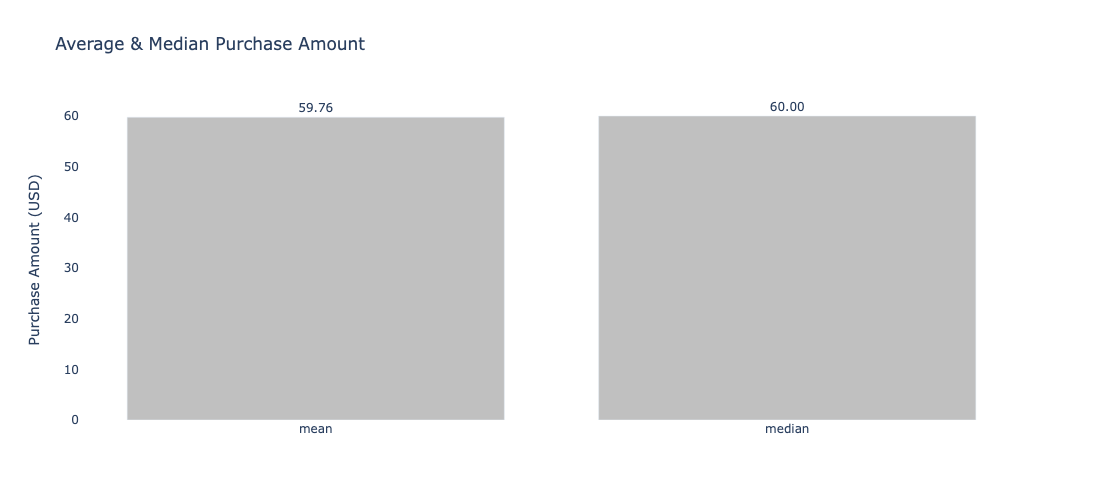

In [92]:
fig = px.bar(sales_df, x=sales_df.index, y=sales_df.values,
             title='Average & Median Purchase Amount',
             color=sales_df.index, 
             color_discrete_sequence=['silver'])

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Purchase Amount (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [93]:
# royal-regular고객 그룹핑한 후 평균단가 확인

df_by_class_USD = df.groupby('customer_class')['Purchase Amount (USD)'].mean()
pd.DataFrame(df_by_class_USD)

Purchase Amount (USD)
customer_class                       
Regular                     59.590387
Royal                       60.028405

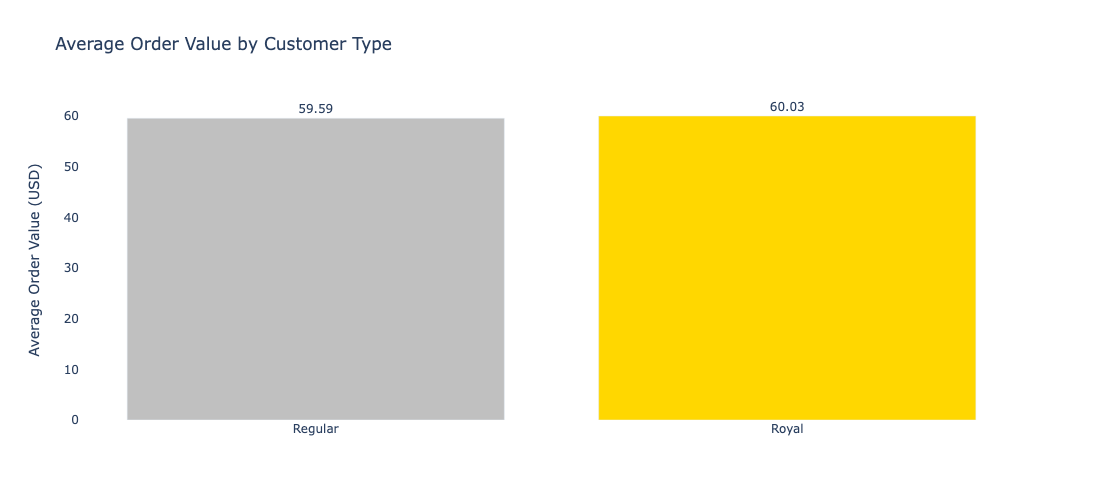

In [94]:
# 고객등급별 객단가

fig = px.bar(df_by_class_USD, x=df_by_class_USD.index, y=df_by_class_USD.values,
             title='Average Order Value by Customer Type',
             color=df_by_class_USD.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Average Order Value (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [95]:
# 거래당 구매단가는 Royal이나 Regular고객이나 비슷하다. 그러면 다음으로 보아야 할 것은 평균 구매횟수이다.
# 평균 구매단가 * 평균 구매횟수 = 1년 예상 매출액

In [96]:
df.groupby('customer_class')['Previous Purchases'].mean()

customer_class
Regular    15.437261
Royal      40.398967
Name: Previous Purchases, dtype: float64

In [97]:
# '평균 구매단가 * 평균 구매횟수' 컬럼 만들어서 그룹별로 예상 매출액 확인

In [98]:
def get_profit_column(customer_class):
    if customer_class == 'Regular':
        return 59.6 * 15
    else:
        return 60 * 40

In [99]:
df['expected_sales'] = df['customer_class'].apply(get_profit_column)

In [100]:
df

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  Massachusetts    S     Maroon  Spring  ...   
3                        90   Rhode Island    M     Maroon  Spring  ...   
4                        49         Oregon    M  Turquoise  Spring  ...   
...                     ...            ...  ...        ...     ...  ...   
3895                     28       Virginia    L  Turquoise  Summer  ...   
3896                     49           Iowa    L      White  Spring  ...   
3897                     33     New Jersey    L      Green  Spring  ...   
3898                     77      Minnesota    S      Brown  Summer  ...   
3899                     81     California    M      Beige  Spring  ...   

      Previous Purchases Payment Method Frequency of Purchases gender  \
0                     14          Venmo            Fortnightly      0   
1                      2           Cash            Fortnightly      0   
2                     23    Credit Card                 Weekly      0   
3                     49         PayPal                 Weekly      0   
4                     31         PayPal               Annually      0   
...                  ...            ...                    ...    ...   
3895                  32          Venmo                 Weekly      1   
3896                  41  Bank Transfer              Bi-Weekly      1   
3897                  24          Venmo              Quarterly      1   
3898                  24          Venmo                 Weekly      1   
3899                  33          Venmo              Quarterly      1   

     subscription_status  discount_applied frequency_of_purchases age_group  \
0                      1                 1                      4       50대   
1                      1                 1                      4       10대   
2                      1                 1                      5       50대   
3                      1                 1                      5       20대   
4                      1                 1                      1       40대   
...                  ...               ...                    ...       ...   
3895                   0                 0                      5       40대   
3896                   0                 0                      4       50대   
3897                   0                 0                      2       40대   
3898                   0                 0                      5       40대   
3899                   0                 0                      2       50대   

      customer_class  expected_sales  
0            Regular           894.0  
1            Regular           894.0  
2            Regular           894.0  
3              Royal          2400.0  
4              Royal          2400.0  
...              ...             ...  
3895           Royal          2400.0  
3896           Royal          2400.0  
3897         Regular           894.0  
3898         Regular           894.0  
3899           Royal          2400.0  

[3900 rows x 25 columns]

In [101]:
expected_sales_df = df.groupby("customer_class")["expected_sales"].sum()
pd.DataFrame(expected_sales_df)

expected_sales
customer_class                
Regular              2101794.0
Royal                3717600.0

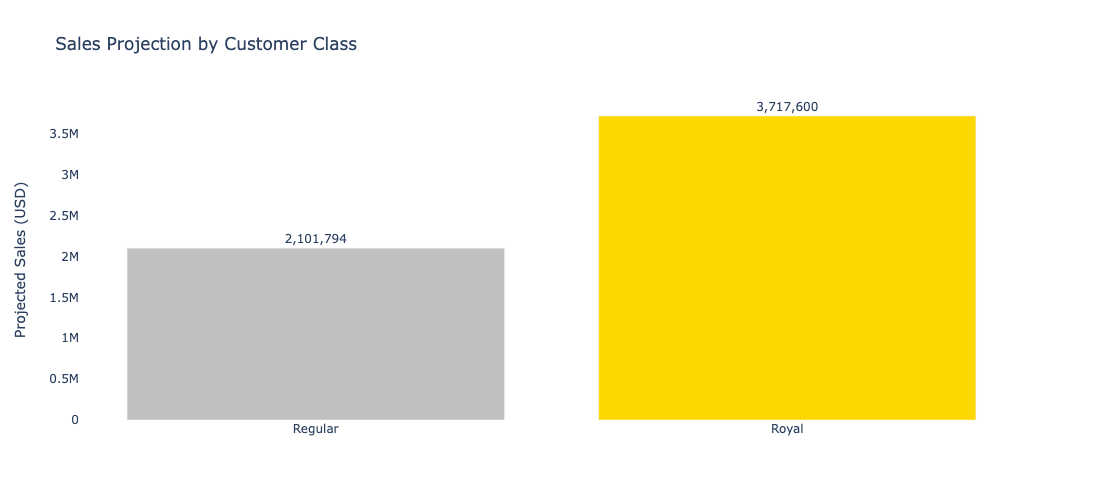

In [102]:
# VIP-Regular고객 1년 예상 매출액 그래프

fig = px.bar(expected_sales_df, x=expected_sales_df.index, y=expected_sales_df.values,
             title='Sales Projection by Customer Class',
             color=expected_sales_df.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Projected Sales (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [103]:
# VIP-Regular고객 예상매출 비율 확인

df_revenue_prop = df.groupby('customer_class')['expected_sales'].sum()/df['expected_sales'].sum()*100
pd.DataFrame(df_revenue_prop)

expected_sales
customer_class                
Regular               36.11706
Royal                 63.88294

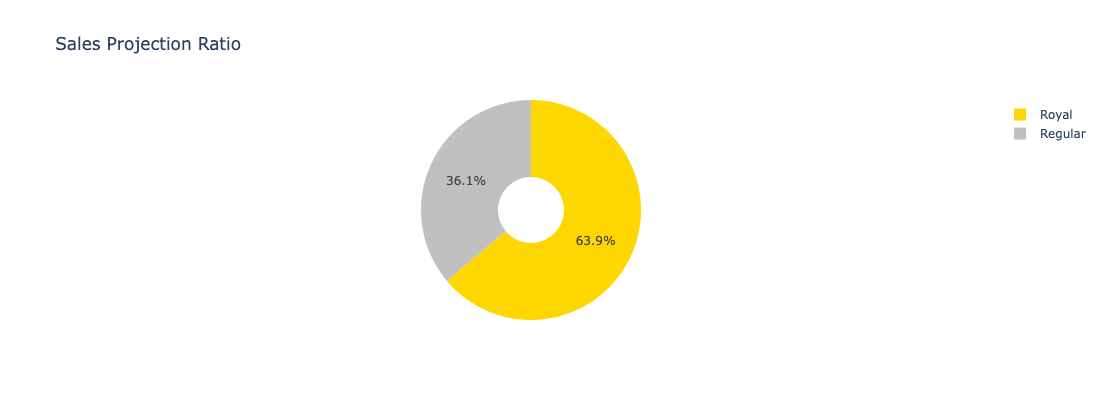

In [104]:
# VIP-Regular고객 예상매출액 비율 그래프

fig = px.pie(df_revenue_prop, values=df_revenue_prop, names=df_revenue_prop.index,
             title='Sales Projection Ratio', color_discrete_sequence=['gold', 'silver'], 
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [105]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준)
df_revenue_per_member = df.groupby('customer_class')['expected_sales'].mean()
pd.DataFrame(df_revenue_per_member)

expected_sales
customer_class                
Regular                  894.0
Royal                   2400.0

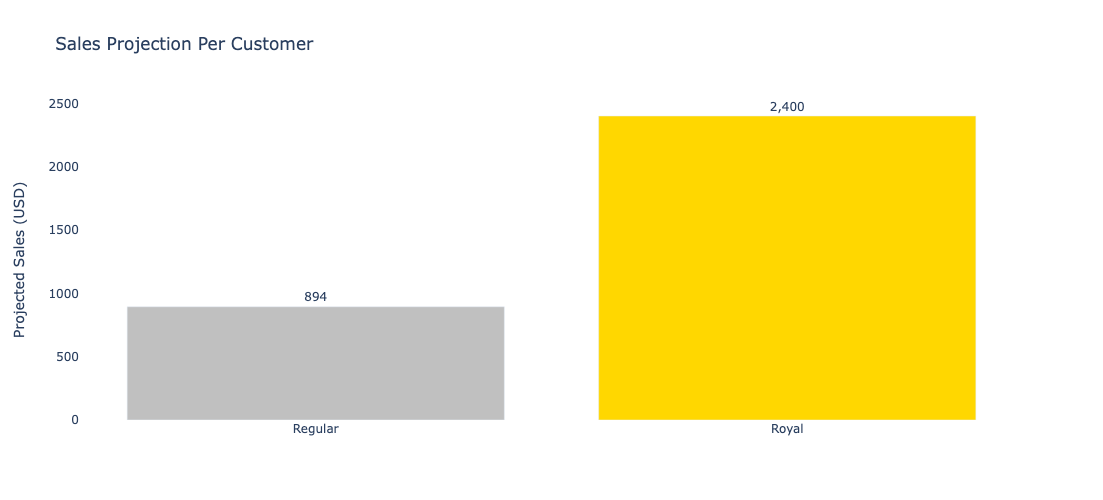

In [106]:
# Royal-Regular고객 1명당 예상 매출액(1년 기준) 그래프

fig = px.bar(df_revenue_per_member, x=df_revenue_per_member.index, y=df_revenue_per_member.values,
             title='Sales Projection Per Customer',
             color=df_revenue_per_member.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Projected Sales (USD)',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [107]:
# Royal-Regular 고객 비율 확인
df_by_class_prop = df.groupby('customer_class')['Customer ID'].count()/df['Customer ID'].count()
pd.DataFrame(df_by_class_prop)

Customer ID
customer_class             
Regular            0.602821
Royal              0.397179

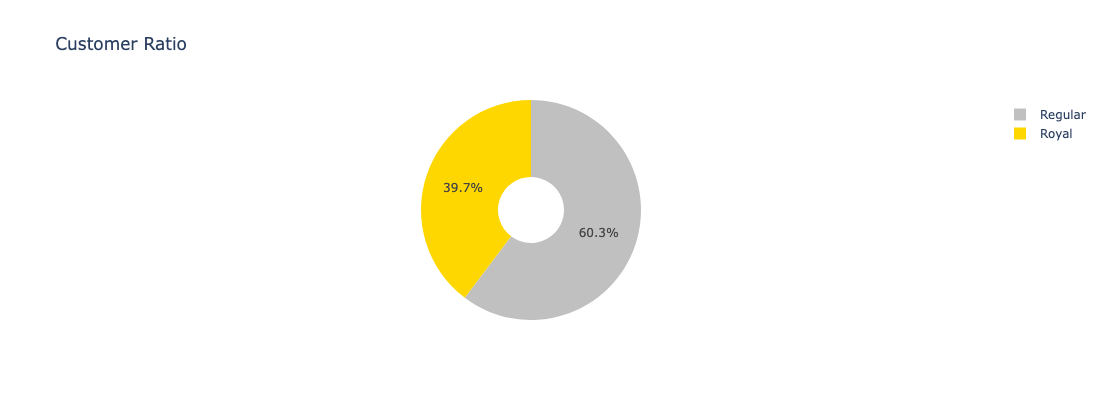

In [108]:
# Royal-Regular고객 비율 그래프

fig = px.pie(df_by_class_prop, values=df_by_class_prop, names=df_by_class_prop.index,
             title='Customer Ratio', color_discrete_sequence=['silver', 'gold'], 
             hole=0.3)

fig.update_layout(
    width=600,  
    height=400,  
)

fig.show()

In [109]:
# Royal-Regular 고객 수 확인
df_by_class = df['customer_class'].value_counts()
pd.DataFrame(df_by_class)

count
customer_class       
Regular          2351
Royal            1549

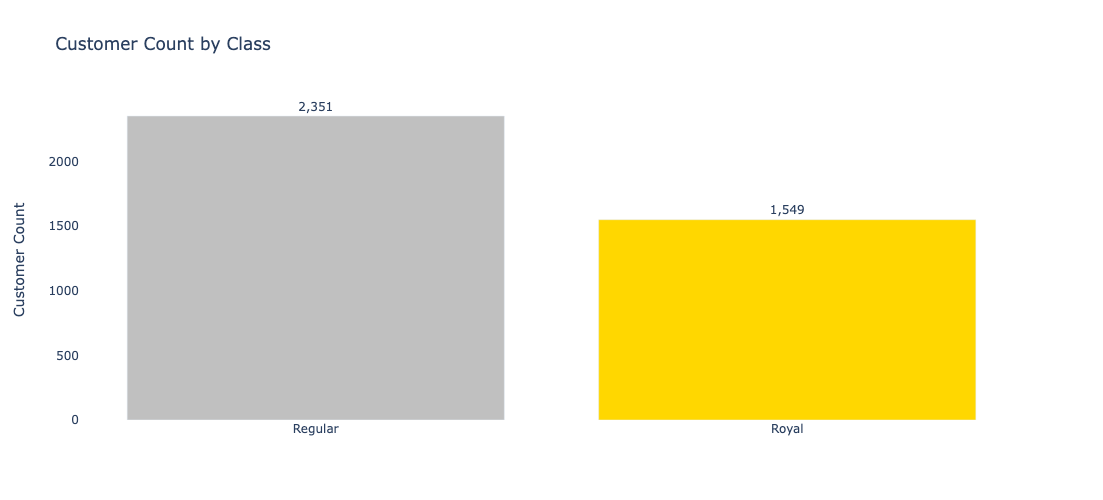

In [110]:
# Royal-Regular 고객 수 그래프

fig = px.bar(df_by_class, x=df_by_class.index, y=df_by_class.values,
             title='Customer Count by Class',
             color=df_by_class.index, 
             color_discrete_sequence=['silver', 'gold'])

fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='Customer Count',    
    width=400,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [111]:
# 충성고객이 매출의 많은 부분을 차지하고 있으므로 충성고객을 대상으로 프로모션을 진행하는 것이 타당해 보인다.
# 충성고객의 연령대와 아이템 추출하자

In [112]:
# 충성고객의 데이터만 추출
# 이미 만들어 놓은 df가 있음 : df_by_royal = df[df['customer_class']=='Royal']
df_by_royal.head()

Customer ID  Age Gender Item Purchased   Category  Purchase Amount (USD)  \
3             4   21   Male        Sandals   Footwear                     90   
4             5   45   Male         Blouse   Clothing                     49   
6             7   63   Male          Shirt   Clothing                     85   
12           13   61   Male           Coat  Outerwear                     72   
13           14   65   Male          Dress   Clothing                     51   

         Location Size      Color  Season  ...  Promo Code Used  \
3    Rhode Island    M     Maroon  Spring  ...              Yes   
4          Oregon    M  Turquoise  Spring  ...              Yes   
6         Montana    M       Gray    Fall  ...              Yes   
12       Delaware    M       Gold  Winter  ...              Yes   
13  New Hampshire    M     Violet  Spring  ...              Yes   

   Previous Purchases Payment Method Frequency of Purchases gender  \
3                  49         PayPal                 Weekly      0   
4                  31         PayPal               Annually      0   
6                  49           Cash              Quarterly      0   
12                 37          Venmo            Fortnightly      0   
13                 31         PayPal                 Weekly      0   

    subscription_status discount_applied frequency_of_purchases  age_group  \
3                     1                1                      5        20대   
4                     1                1                      1        40대   
6                     1                1                      2        60대   
12                    1                1                      4        60대   
13                    1                1                      5        60대   

    customer_class  
3            Royal  
4            Royal  
6            Royal  
12           Royal  
13           Royal  

[5 rows x 24 columns]

In [113]:
# Royal고객 연령대 확인
df_by_royal_age = df_by_royal['age_group'].value_counts().sort_index()
pd.DataFrame(df_by_royal_age)

count
age_group       
10대           52
20대          283
30대          275
40대          279
50대          327
60대          307
70대           26

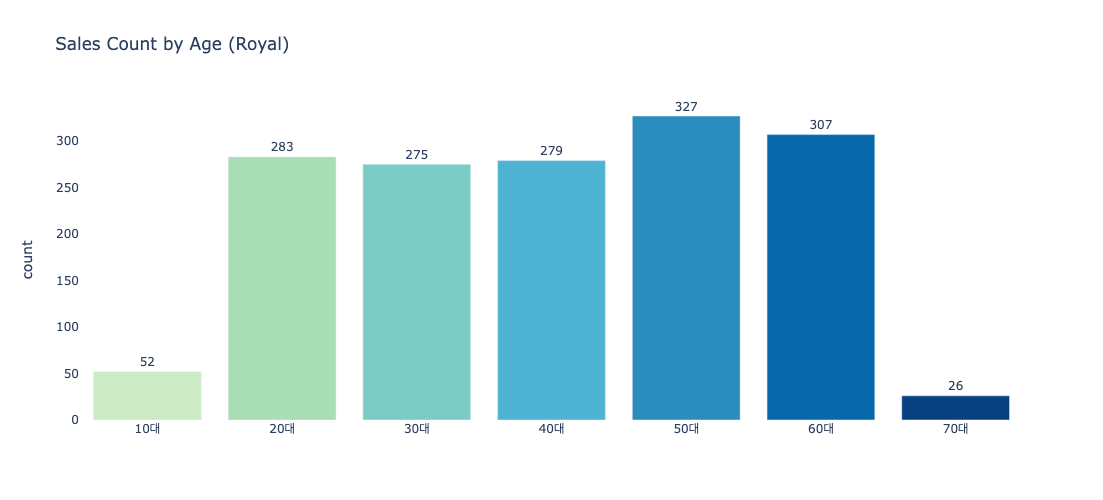

In [114]:
# Royal고객 연령대 그래프

fig = px.bar(df_by_royal_age, x=df_by_royal_age.index, y='count',
             title='Sales Count by Age (Royal)',
             color=df_by_royal_age.index,  
             color_discrete_sequence=px.colors.sequential.GnBu[2:])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',   
    width=600,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [115]:
# 봄시즌 남성 Royal 데이터만 추출

df_by_spring_royal_men = df[(df['Season']=='Spring') & (df['customer_class']=='Royal') & (df['Gender']=='Male')]
df_by_spring_royal_men.head()

Customer ID  Age Gender Item Purchased     Category  \
3             4   21   Male        Sandals     Footwear   
4             5   45   Male         Blouse     Clothing   
13           14   65   Male          Dress     Clothing   
16           17   25   Male     Sunglasses  Accessories   
34           35   36   Male        T-shirt     Clothing   

    Purchase Amount (USD)       Location Size      Color  Season  ...  \
3                      90   Rhode Island    M     Maroon  Spring  ...   
4                      49         Oregon    M  Turquoise  Spring  ...   
13                     51  New Hampshire    M     Violet  Spring  ...   
16                     36        Alabama    S       Gray  Spring  ...   
34                     91   North Dakota    L     Violet  Spring  ...   

    Previous Purchases Payment Method Frequency of Purchases gender  \
3                   49         PayPal                 Weekly      0   
4                   31         PayPal               Annually      0   
13                  31         PayPal                 Weekly      0   
16                  44     Debit Card              Bi-Weekly      0   
34                  38         PayPal              Quarterly      0   

   subscription_status  discount_applied frequency_of_purchases age_group  \
3                    1                 1                      5       20대   
4                    1                 1                      1       40대   
13                   1                 1                      5       60대   
16                   1                 1                      4       20대   
34                   1                 1                      2       30대   

    customer_class  expected_sales  
3            Royal          2400.0  
4            Royal          2400.0  
13           Royal          2400.0  
16           Royal          2400.0  
34           Royal          2400.0  

[5 rows x 25 columns]

In [116]:
# 봄시즌 남성 Royal고객 구입 아이템 확인
df_by_spring_royal_men_item = df_by_spring_royal_men['Item Purchased'].value_counts().sort_values(ascending=False).head()
pd.DataFrame(df_by_spring_royal_men_item)

count
Item Purchased       
Dress              19
Jewelry            16
T-shirt            15
Gloves             15
Sweater            15

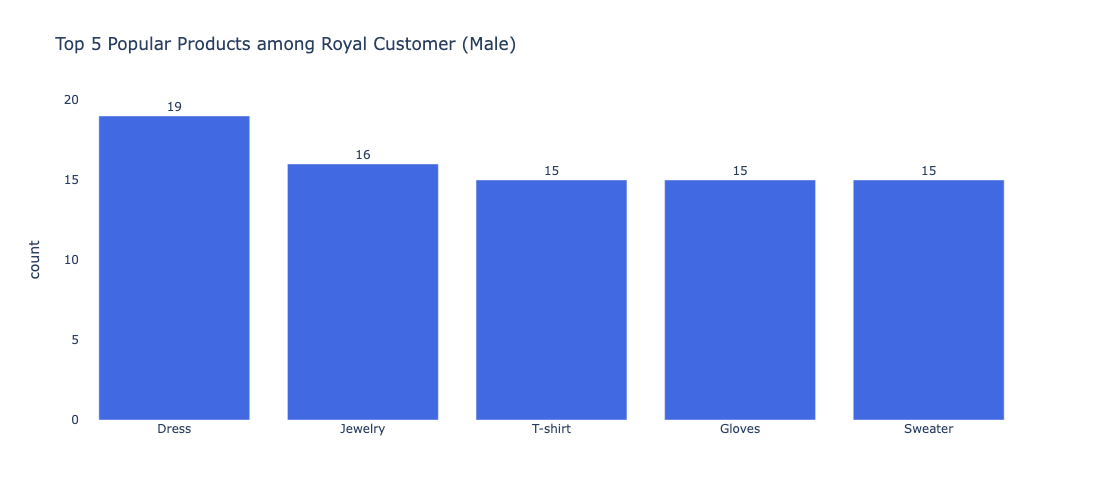

In [117]:
# 봄시즌 남성 충성고객 구입 아이템 그래프

fig = px.bar(df_by_spring_royal_men_item, x=df_by_spring_royal_men_item.index, y='count',
             title='Top 5 Popular Products among Royal Customer (Male)',
             color=df_by_spring_royal_men_item.index,  
             color_discrete_sequence=['royalblue'])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',   
    width=600,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()

In [118]:
# 봄시즌 여성 Royal고객  데이터만 추출

df_by_spring_royal_women = df[(df['Season']=='Spring') & (df['customer_class']=='Royal') & (df['Gender']=='Female')]
df_by_spring_royal_women.head()

Customer ID  Age  Gender Item Purchased     Category  \
2660         2661   24  Female          Pants     Clothing   
2669         2670   39  Female           Belt  Accessories   
2678         2679   33  Female           Belt  Accessories   
2694         2695   66  Female     Sunglasses  Accessories   
2704         2705   52  Female          Dress     Clothing   

      Purchase Amount (USD)        Location Size    Color  Season  ...  \
2660                     85  South Carolina    L   Yellow  Spring  ...   
2669                     28        Illinois    L     Teal  Spring  ...   
2678                     91         Montana    M  Magenta  Spring  ...   
2694                     27       Louisiana    M    Olive  Spring  ...   
2704                     54       Tennessee    L    Beige  Spring  ...   

      Previous Purchases Payment Method Frequency of Purchases gender  \
2660                  44          Venmo               Annually      1   
2669                  31    Credit Card                 Weekly      1   
2678                  34    Credit Card              Bi-Weekly      1   
2694                  34    Credit Card         Every 3 Months      1   
2704                  35     Debit Card                 Weekly      1   

     subscription_status  discount_applied frequency_of_purchases age_group  \
2660                   0                 0                      1       20대   
2669                   0                 0                      5       30대   
2678                   0                 0                      4       30대   
2694                   0                 0                      2       60대   
2704                   0                 0                      5       50대   

      customer_class  expected_sales  
2660           Royal          2400.0  
2669           Royal          2400.0  
2678           Royal          2400.0  
2694           Royal          2400.0  
2704           Royal          2400.0  

[5 rows x 25 columns]

In [119]:
# 봄시즌 여성 Royal고객 구입 아이템 확인
df_by_spring_royal_women_item = df_by_spring_royal_women['Item Purchased'].value_counts().sort_values(ascending=False).head(7)
pd.DataFrame(df_by_spring_royal_women_item)

count
Item Purchased       
Blouse              9
Skirt               8
Shoes               8
Handbag             7
Hoodie              6
Sandals             6
Dress               6

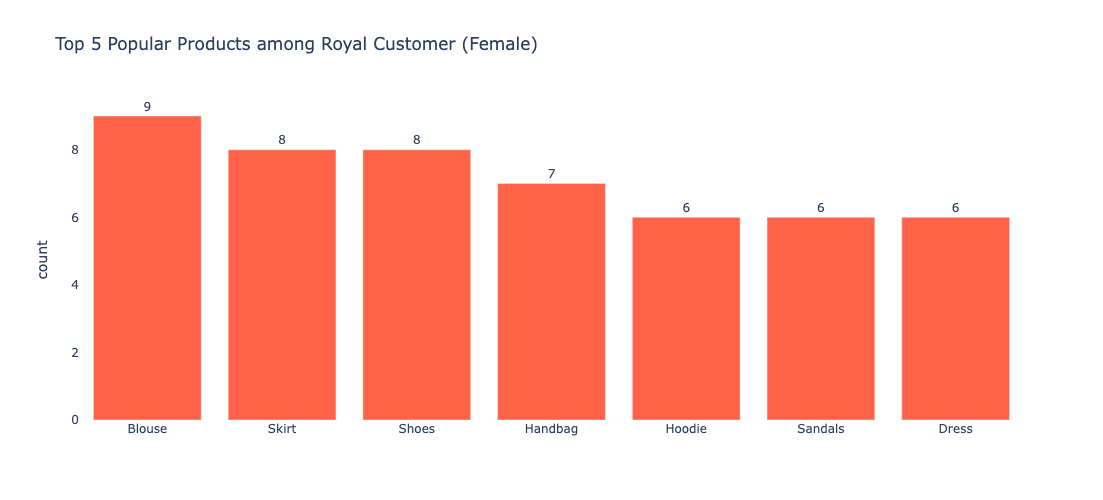

In [120]:
# 봄시즌 여성 Royal고객 구입 아이템 수 그래프

fig = px.bar(df_by_spring_royal_women_item, x=df_by_spring_royal_women_item.index, y='count',
             title='Top 5 Popular Products among Royal Customer (Female)',
             color=df_by_spring_royal_women_item.index,  
             color_discrete_sequence=['tomato'])

fig.update_traces(texttemplate='%{y:.0f}', textposition='outside')  

fig.update_layout(
    xaxis_title='', 
    yaxis_title='count',   
    width=600,  
    height=500,
    showlegend=False, 
    plot_bgcolor='white')

fig.show()